# Jupyter Notebook Title

## Contents of Notebook
Description of contents:

covers Vanderplas examples

Author: Don Cameron

Contact: donrcameron@gmail.com, +61 (0) 413208746

### Notebook magic commands

In [1]:
%matplotlib inline


### Notebook imports

In [2]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime
from pathlib import Path
import githubid.githubid as gid

import matplotlib.pyplot as plt

from urllib.request import urlretrieve


### Notebook version status

In [3]:
#%%javascript
#var kernel = IPython.notebook.kernel;
#var thename = window.document.getElementById("notebook_name").innerHTML;
#var command = "theNotebook = " + "'"+thename+"'";
#kernel.execute(command);

# the above Javascript hack fails under a batch execute all cells, due to a race condition

# change approach to hardcode Notebook name, but check it is the current working directory

notebook_name = '2018-2-11-dc-BikeTripAnalysisNotebook.ipynb'
here = Path('.')
notebook_path = here / notebook_name 
assert  notebook_path.exists(), 'Notebook not found: ' + notebook_name


In [4]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + notebook_name)
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:42) [MSC v.1900 64 bit (AMD64)]
python environment : root36
pandas version : 0.21.0
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\BikeTripAnalysisNotebookProject\develop
Notebook name: 2018-2-11-dc-BikeTripAnalysisNotebook.ipynb
Notebook run at: 2018-02-13 20:38:21.162380 local time
Notebook run at: 2018-02-13 10:38:21.162380 UTC
Notebook run on: Windows-10-10.0.16299-SP0


## Get the identification of git repository holding notebook

In [5]:


#  GIT_LOCATION is the path of the git executable
GIT_LOCATION = \
'C:\\Users\\donrc\\AppData\\Local\\GitHub\\PortableGit_f02737a78695063deace08e96d5042710d3e32db\\cmd\\git.exe'

print(gid.get_repo_version(git_location=GIT_LOCATION))

('refs/heads/improve-datetime-reading', '39693331b2dcc4ff910802e4800a291577e00d11', '', '3969333', 'C:/Users/donrc/Documents/JupyterNotebooks/BikeTripAnalysisNotebookProject', 'https://github.com/coolum001/BikeTripAnalysisNotebookProject.git')


## Load the Data

Define a function to load a csv dataset.  If the file specified exists, use it, otherwise download it
from the nominated URL.

We expect a column labelled 'Date', that we use as a index.

We rename the columns to use shorter names

In [1]:
from bikeloader import bikeloader as bl
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
csv_file = '../data/fremont.csv'

bikedf = bl. load_csv_datetime_data(url=url, file_path = csv_file)



In [2]:
bikedf.columns

Index(['West', 'East'], dtype='object')

In [3]:
type(bikedf.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Explore the data

In [9]:
bikedf.head()

,West,East
Date,,
10/03/2012 12:00:00 AM,4.0,9.0
10/03/2012 01:00:00 AM,4.0,6.0
10/03/2012 02:00:00 AM,1.0,1.0
10/03/2012 03:00:00 AM,2.0,3.0
10/03/2012 04:00:00 AM,6.0,1.0


In [10]:
bikedf.tail()

,West,East
Date,,
12/31/2017 07:00:00 PM,9.0,12.0
12/31/2017 08:00:00 PM,6.0,8.0
12/31/2017 09:00:00 PM,3.0,10.0
12/31/2017 10:00:00 PM,7.0,6.0
12/31/2017 11:00:00 PM,7.0,9.0


Show minute by minute counts

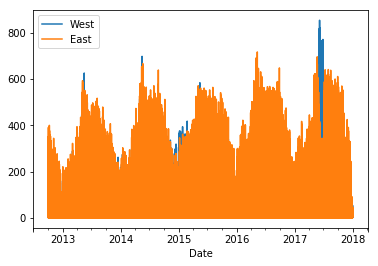

In [19]:
bikedf.plot()

Check the datatype of the index

In [20]:
type(bikedf.index)

pandas.core.indexes.datetimes.DatetimeIndex

Resample data by summing over each week  (by default pandas has weeks starting Sunday)

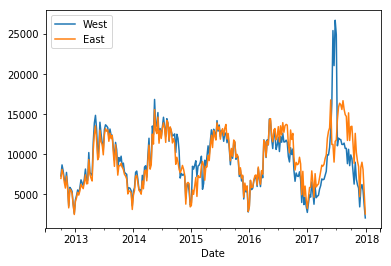

In [21]:
bikedf.resample(rule='W').sum().plot()

Resample to sum over each month

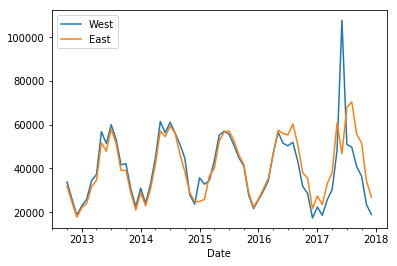

In [22]:
bikedf.resample(rule='M').sum().plot()

Plot yearly totals

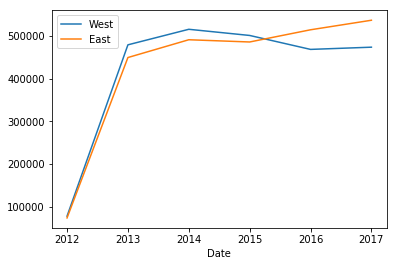

In [23]:
bikedf.resample(rule='Y').sum().plot()

Switch to seaborn style graphs

In [24]:
plt.style.use('seaborn')

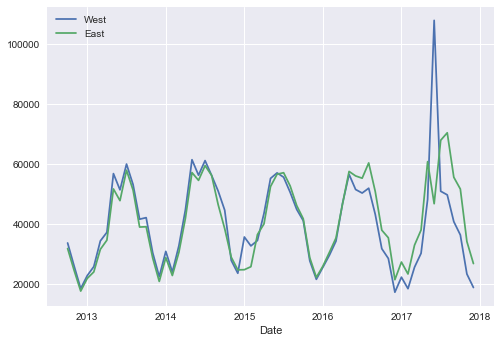

In [25]:
bikedf.resample(rule='M').sum().plot()

Sum data by day, and sum by a rolling 365 day window.  Create a new data column showing the total of East and West counts

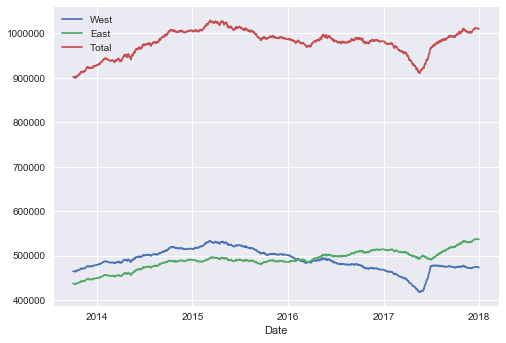

In [26]:
bikedf['Total'] = bikedf['East']+bikedf['West']

bikedf.resample(rule='D').sum().rolling(365).sum().plot()

Group the data by hour of day, and plot the mean count in each hour

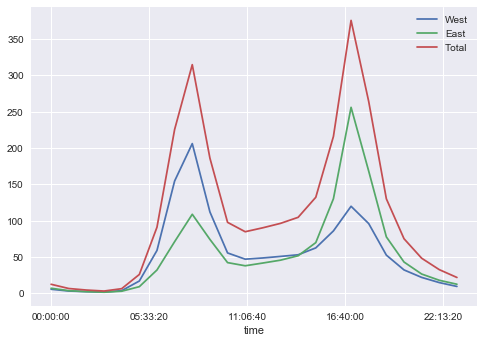

In [27]:
bikedf.groupby(bikedf.index.time).mean().plot()

Show the maximum count for each hour of the day

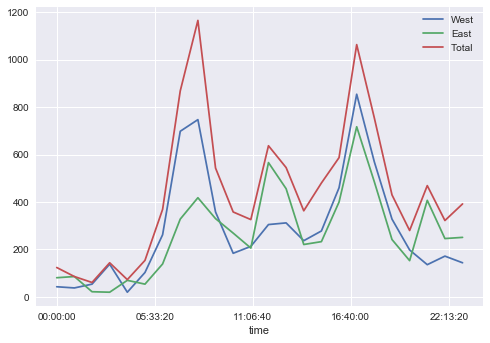

In [28]:
bikedf.groupby(bikedf.index.time).max().plot()

Show the mean hourly count, and maximum hourly count on the same figure

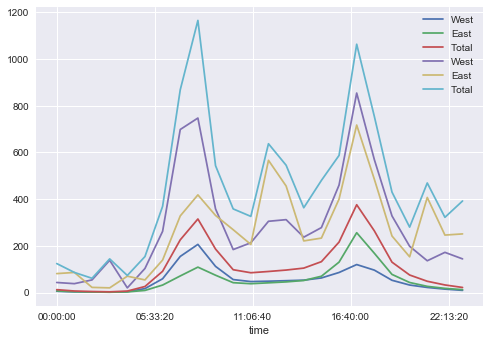

In [29]:
ax = bikedf.groupby(bikedf.index.time).mean().plot()
bikedf.groupby(bikedf.index.time).max().plot(ax=ax)

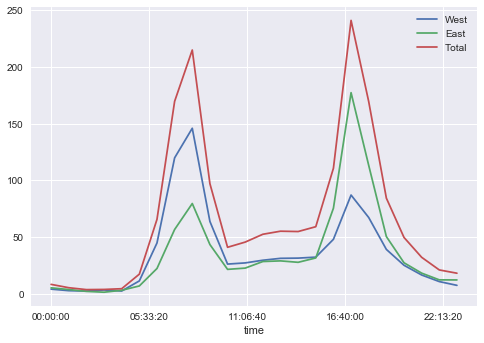

In [30]:
bikedf.groupby(bikedf.index.time).std().plot()

Create columns for each day in period; index now rums over hour of day;  data values are the total bike count (E & W)


In [31]:
pivoted = bikedf.pivot_table('Total', index=bikedf.index.time, columns=bikedf.index.date)

pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


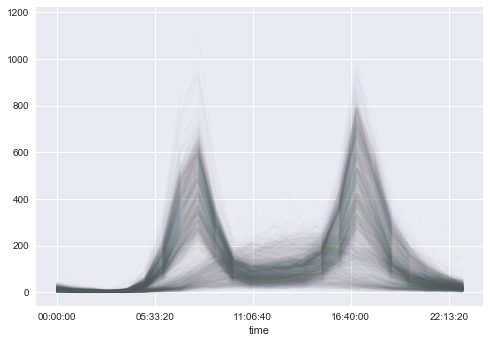

In [32]:
pivoted.plot(legend=False, alpha=0.01)

In [33]:
bike_timestamps = bikedf.index

In [34]:
bike_timestamps[0]

Timestamp('2012-10-03 00:00:00')

In [35]:
bike_timestamps.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=45984)

In [36]:
bike_timestamps.weekday

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='Date', length=45984)

In [37]:
wbikedf = bikedf[bike_timestamps.weekday<5]

In [38]:
wpivoted = wbikedf.pivot_table('Total', index=wbikedf.index.time, columns=wbikedf.index.date)

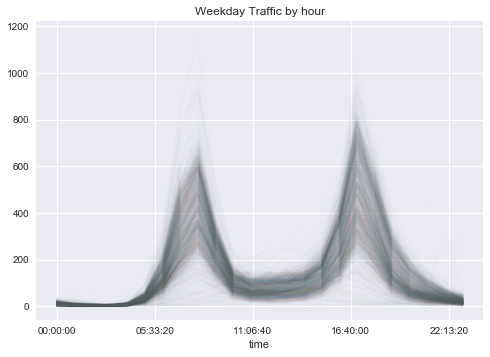

In [39]:
wpivoted.plot(legend=False, alpha=0.01, title='Weekday Traffic by hour')

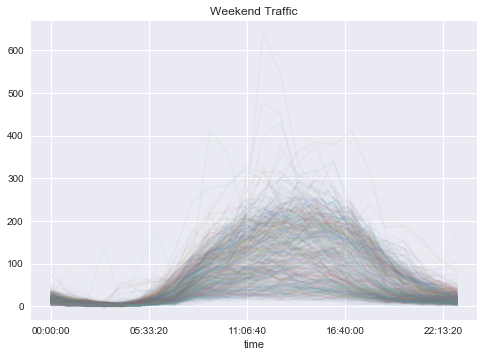

In [40]:
hbikedf = bikedf[bike_timestamps.weekday>4]
hpivoted = hbikedf.pivot_table('Total', index=hbikedf.index.time, columns=hbikedf.index.date)
hpivoted.plot(legend=False, alpha=0.05, title='Weekend Traffic')

In [4]:
!pytest

============================= test session starts =============================
platform win32 -- Python 3.6.3, pytest-3.2.5, py-1.5.2, pluggy-0.4.0
rootdir: C:\Users\donrc\Documents\JupyterNotebooks\BikeTripAnalysisNotebookProject\develop, inifile:
collected 3 items

test_bikedataloader.py ...

========================== 3 passed in 8.08 seconds ===========================


### Customizations for notebook

In [97]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [98]:
#from IPython.display import FileLink
#FileLink('../develop/a.ipynb')

C:\Users\donrc\Documents\JupyterNotebooks\BikeTripAnalysisNotebookProject\develop\a.ipynb

### Display associated webpages (eg source of data)

In [99]:
from IPython.display import IFrame
IFrame("http://www.net-analysis.com", width = 800, height = 200)

### Save figures to figures directory

In [42]:
def save_figure(figure_title='TemplateNotebookFigure', figure_prefix='../figures/'):
    """
     save_figure:  same the current matplotlib.pyplot figure as a jpg file

     a file is generated from the supplied title, and the date and time

     Inputs:
     figure_title: string, incorporated into file name
     figure_prefix: string giving relative (or absolute) path the save location
     Returns:
     True is save OK
     False otherwise

     Outputs:
     prints error messages on exceptions

    """

    try:
        fname     = figure_prefix+figure_title+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.jpg'
        plt.savefig(fname)
        print(fname+' saved.')
    except IOError as err:
        print('Unable to save figure - IO Error!')
        print("IO error: {0}".format(err))
    except OSError as err:
        print('Unable to save figure - OS Error!')
        print("OS error: {0}".format(err))
    except:
        print('Unable to save figure - Unexpected Error!')
        print("Unexpected error:", sys.exc_info()[0])
        raise
    #end try
#end save_figure

x         =[1,2,3,4,5,6]
y         =[2,4,5,2,5,9]
#plot2     = sns.barplot(x=x, y=y)

#save_figure(figure_title='Test', figure_prefix=FIGURE_PREFIX)

#plt.show()

### Display images

In [41]:
from IPython.display import Image
#Image(filename='../figures/apc.jpg', height = 100, width = 200)

## Conclusions / Summary